# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Configurações

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
options(repr.plot.width = 7, repr.plot.height = 4)

### Lendo o dataset do projeto

In [3]:
dados = read.csv('data/dados.csv')

In [ ]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


---

# <font color=green>2 RODANDO UMA REGRESSÃO LINEAR</font>
***

## Dataset de exemplo
> ### $Y$ = Gasto das famílias
> ### $X$ = Renda das Famílias

In [ ]:
dataset = data.frame(
    Y = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    X = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

In [ ]:
head(dataset)

,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


In [ ]:
nrow(dataset)

[1] 50

### Estatísticas descritivas

In [ ]:
summary(dataset)

       Y              X       
 Min.   : 353   Min.   :1069  
 1st Qu.:1362   1st Qu.:3516  
 Median :2127   Median :6363  
 Mean   :2011   Mean   :6066  
 3rd Qu.:2676   3rd Qu.:8382  
 Max.   :3302   Max.   :9997  

In [ ]:
apply(dataset, 2, sd)

Y         X 
 817.2146 2707.1878

### Análise gráfica

#### <font color=red>Documentações:

- [***package* ggplot2**](https://www.rdocumentation.org/packages/ggplot2)
- [**stack**](https://www.rdocumentation.org/packages/utils/versions/3.6.1/topics/stack)

In [ ]:
stack(dataset)

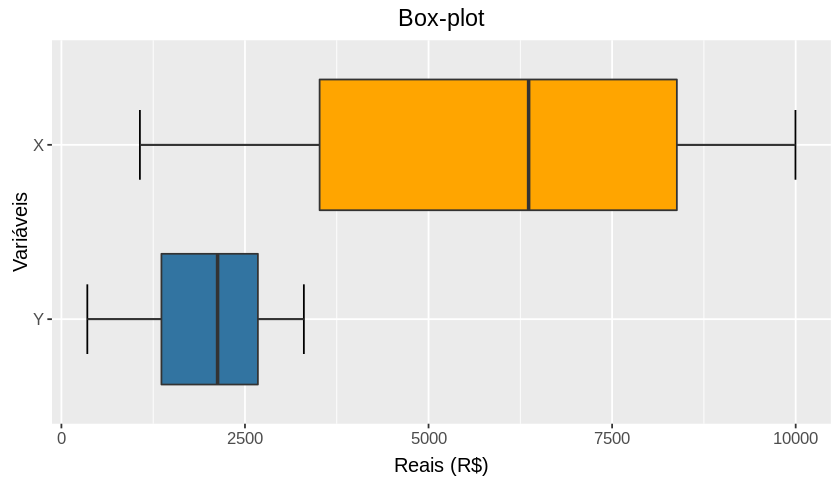

In [ ]:
ggplot(stack(dataset), aes(x = ind, y = values)) + 
    stat_boxplot(geom ='errorbar', width = 0.4) + 
    geom_boxplot(fill = c('#3274A1', "orange")) + 
    coord_flip() +
    xlab("Variáveis") + 
    ylab("Reais (R$)") + 
    ggtitle('Box-plot') +
    theme(
        plot.title=element_text(size = 14, hjust = 0.5),
        axis.title.y=element_text(size = 12, vjust = +0.2),
        axis.title.x=element_text(size = 12, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

`geom_smooth()` using formula 'y ~ x'



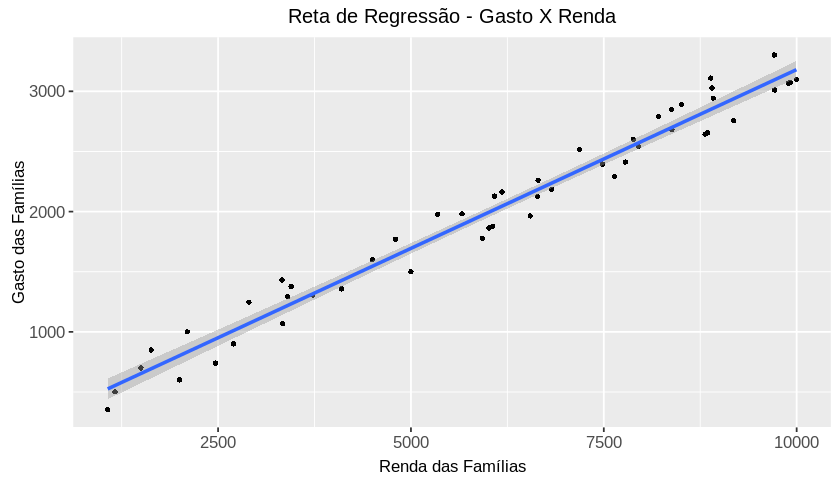

In [ ]:
ggplot(data = dataset, aes(x = X, y = Y)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_smooth(method = lm) +
    xlab("Renda das Famílias") + 
    ylab("Gasto das Famílias") + 
    ggtitle('Reta de Regressão - Gasto X Renda') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

### Análise da correlação

#### <font color=red>Documentações:

- [**cor**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/cor)

In [ ]:
cor(dataset)

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


### Modelo de regressão linear simples

#### <font color=red>Documentações:

- [**lm**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/lm)

### Estimando o modelo

In [ ]:
resultado_regressao <- 
resultado_regressao

### Obtendo as previsões dentro da amostra

In [ ]:
dataset['Y_previsto'] <- 
dataset

---

# <font color=green>3 CORRELAÇÃO</font>
***

## <font color=green>3.1 Covariância</font>
***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

#### <font color=red>Documentações:

- [**sample**](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/sample)
- [**cov**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/cor)

### Gerando uma amostra aleatória para facilitar o entendimento

In [ ]:
amostra <- data.frame(
    Idade = c(39, 29, 21, 49, 29, 34, 32, 32, 24, 53, 28, 28, 46, 58, 41, 43, 31, 55, 52, 54),
    Renda = c(1500, 1000, 3500, 1570, 600, 1200, 2000, 500, 1300, 600, 1500, 3000, 0, 550, 1500, 1600, 746, 1000, 0, 1400),
    Anos.de.Estudo = c(6, 7, 12, 13, 9, 12, 12, 6, 7, 5, 7, 16, 12, 3, 12, 9, 1, 6, 1, 6),
    Altura = c(1.6162, 1.7525, 1.6940, 1.8041, 1.7854, 1.7468, 1.6633, 1.6937, 1.6569, 1.6671, 1.6786, 1.6730, 1.7853, 1.6090, 1.7833, 1.6709, 1.6392, 1.6861, 1.7107, 1.7288)
)

### Obtendo a matriz de covariância

In [ ]:
matriz_cov <-cov(amostra)
matriz_cov

,Idade,Renda,Anos.de.Estudo,Altura
Idade,1.344105e+02,-4947.96842,-16.4105263,0.016483684
Renda,-4.947968e+03,764668.32632,2209.0210526,-7.139630000
Anos.de.Estudo,-1.641053e+01,2209.02105,16.9368421,0.111258421
Altura,1.648368e-02,-7.13963,0.1112584,0.003353907


### Identificando as variâncias na diagonal principal da matriz

In [ ]:
var(amostra$Idade)

[1] 134.4105

## <font color=green>3.2 Interpretação da Covariância</font>
***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Verificando a existência de uma associação linear negativa

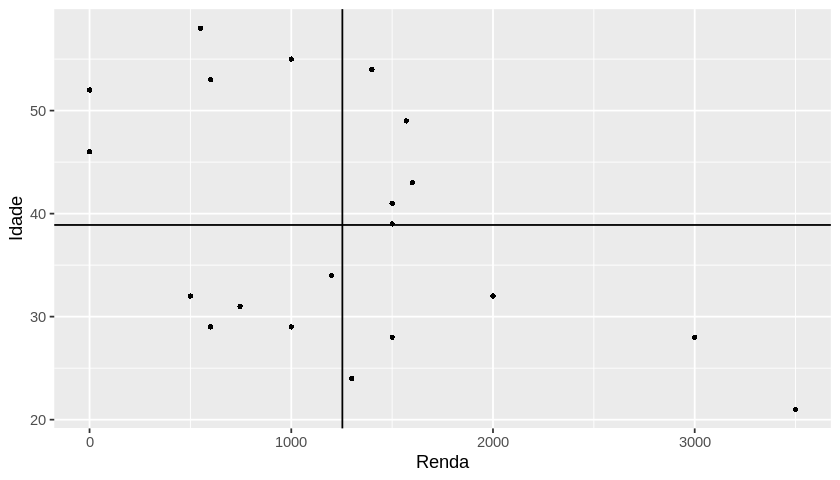

In [ ]:
grafico <- amostra[, c('Renda', 'Idade')]

ggplot(data = grafico, aes(x = Renda, y = Idade)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_hline(yintercept = mean(amostra$Idade), color = 'black') + 
    geom_vline(xintercept = mean(amostra$Renda), color = 'black')

### Verificando a existência de uma associação linear positiva

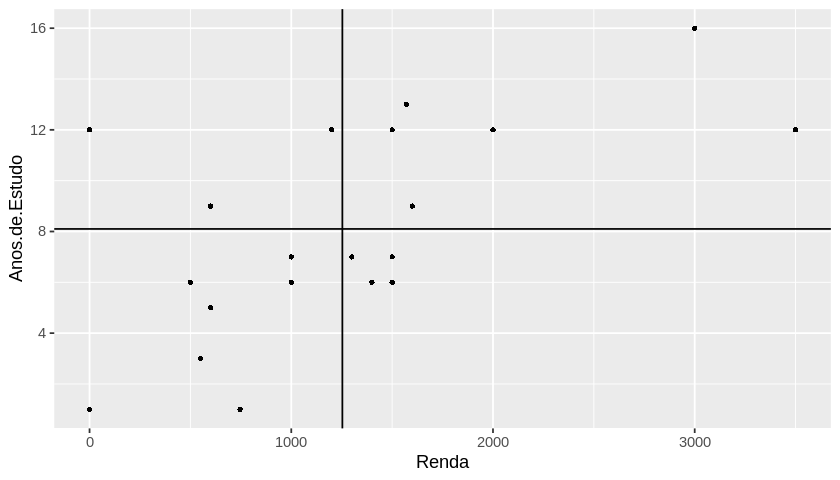

In [ ]:
grafico <- amostra[, c('Renda', 'Anos.de.Estudo')]

ggplot(data = grafico, aes(x = Renda, y = Anos.de.Estudo)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_hline(yintercept = mean(amostra$'Anos.de.Estudo'), color = 'black') + 
    geom_vline(xintercept = mean(amostra$Renda), color = 'black')

### Verificando a inexistência de uma associação linear entre as variáveis

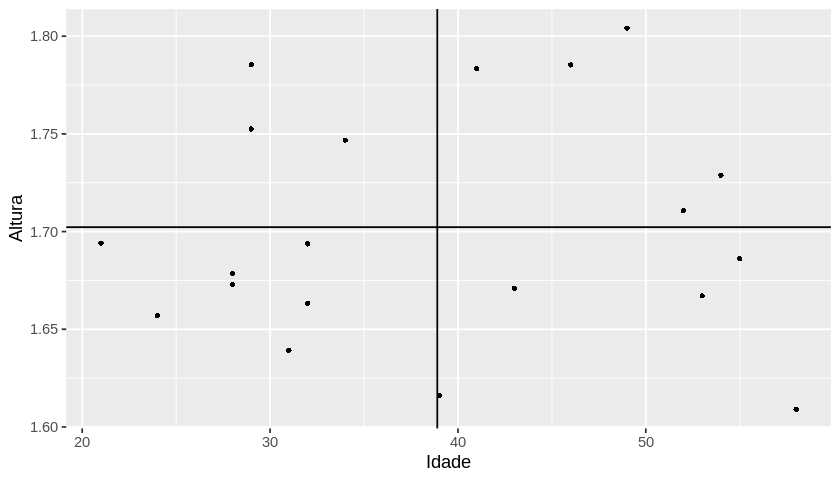

In [ ]:
grafico <- amostra[, c('Idade', 'Altura')]

ggplot(data = grafico, aes(x = Idade, y = Altura)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_hline(yintercept = mean(amostra$Altura), color = 'black') + 
    geom_vline(xintercept = mean(amostra$Idade), color = 'black')

### <font color='red'>Observação Importante:</font>
> Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.
> 
> Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.

## <font color=green>3.3 Coeficiente de correlação de Pearson</font>
***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

### Obtendo $s_{xy}$

In [ ]:
s_xy <- cov(amostra[c('Altura', 'Renda')])
s_xy

,Altura,Renda
Altura,0.003353907,-7.13963
Renda,-7.139630000,764668.32632


In [ ]:
s_xy <- s_xy['Altura', 'Renda']
s_xy

[1] -7.13963

### Obtendo $s_x$ e $s_y$

In [ ]:
s_x <- sd(amostra$Altura)
s_y <- sd(amostra$Renda)

### Obtendo o coeficiente de correlação $r_{xy}$

In [ ]:
r_xy <- s_xy / (s_x * s_y)
r_xy

[1] -0.140982

### Obtendo uma matriz de correlação

In [ ]:
cor(amostra[c('Renda', 'Altura')])

,Renda,Altura
Renda,1.000000,-0.140982
Altura,-0.140982,1.000000


In [ ]:
cor(dataset[c('Y', 'X')])

,Y,X
Y,1.0000000,0.9848352
X,0.9848352,1.0000000


In [ ]:
data = data.frame(
    Gastos = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    Renda = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

cov(data)
cor(data)


,Gastos,Renda
Gastos,667839.8,2178804
Renda,2178803.6,7328866


,Gastos,Renda
Gastos,1.0000000,0.9848352
Renda,0.9848352,1.0000000


In [ ]:
correlacao = 2178803.59 / (sqrt(7328865.85) * sqrt(667839.78))
correlacao

[1] 0.9848352

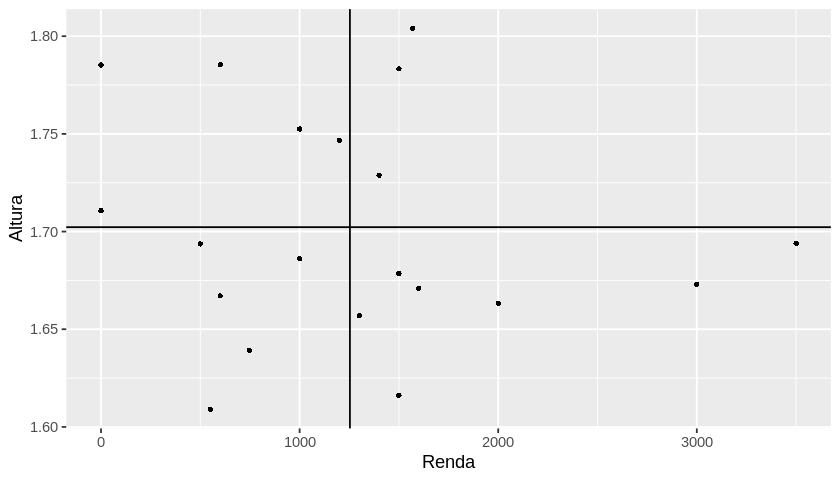

In [ ]:
grafico <- amostra[, c('Renda', 'Altura')]

ggplot(data = grafico, aes(x = Renda, y = Altura)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_hline(yintercept = mean(amostra$Altura), color = 'black') + 
    geom_vline(xintercept = mean(amostra$Renda), color = 'black')

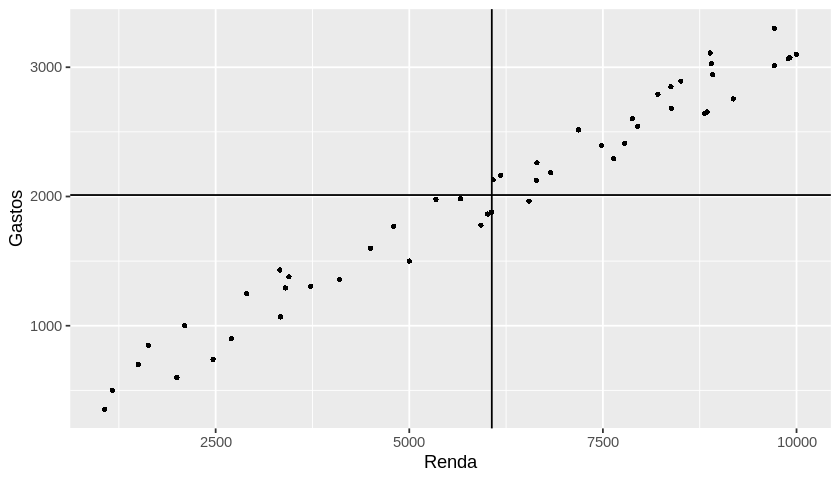

In [ ]:
ggplot(data = data, aes(x = Renda, y = Gastos)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_hline(yintercept = mean(dataset$Y), color = 'black') + 
    geom_vline(xintercept = mean(dataset$X), color = 'black')

---

# <font color=green>4 REGRESSÃO LINEAR</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## <font color=green>4.1 Regressão linear simples</font>
***

### Função consumo

Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### Carregando o dataset

In [9]:
dataset <- data.frame(
    Y = c(3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770),
    X = c(9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800)
)

In [10]:
head(dataset)

,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


### Identificando a relação entre as variáveis

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

`geom_smooth()` using formula 'y ~ x'



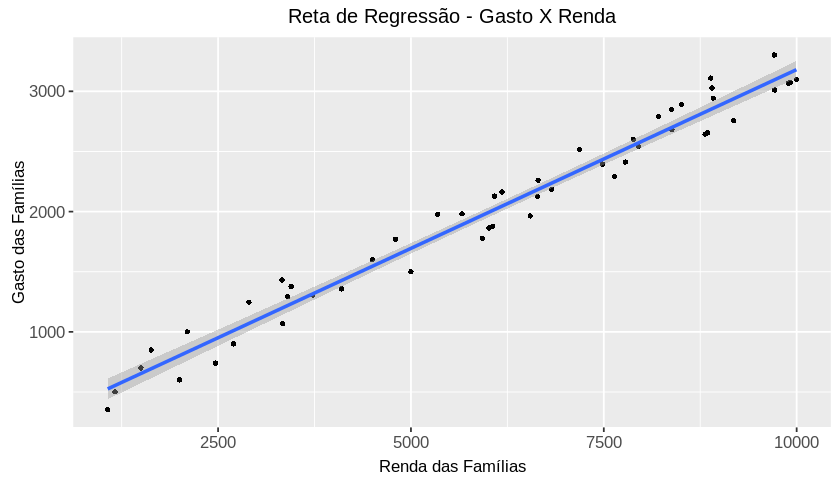

In [11]:
ggplot(data = dataset, aes(x = X, y = Y)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_smooth(method = lm) +
    xlab("Renda das Famílias") + 
    ylab("Gasto das Famílias") + 
    ggtitle('Reta de Regressão - Gasto X Renda') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

### Matriz de correlação

### Função de regressão populacional

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. Os coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

O gráfico de dispersão mais abaixo deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = E(Y|X_i) + u_i$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também conhecida como termo de erro estocástico.

Observe que a partir da elaboração acima podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

## <font color=green>4.2 O método de mínimos quadrados</font>
***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos têm o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

## <font color=green>4.3 Estimadores de mínimos quadrados ordinários</font>
***

### Obter $n$

In [14]:
n <- nrow(dataset)
n

[1] 50

### Obter $\sum{Y}$

In [15]:
SOMA_Y <- sum(dataset$Y)
SOMA_Y

[1] 100556

### Obter $\sum{X}$

In [16]:
SOMA_X <- sum(dataset$X)
SOMA_X

[1] 303275

### Obter $\sum{X^2}$

In [17]:
dataset$X2 <- dataset$X ** 2

In [18]:
SOMA_X2 <- sum(dataset$X2)
SOMA_X2

[1] 2198628939

In [19]:
SOMA_X2 <- sum( apply(dataset, 1, function(x) x['X'] ** 2) )
SOMA_X2

[1] 2198628939

In [20]:
dataset$X2 <- NULL
head(dataset)

,Y,X
,<dbl>,<dbl>
1,3011,9714
2,1305,3728
3,1879,6062
4,2654,8845
5,2849,8378
6,1068,3338


### Obter $\sum{Y^2}$

In [21]:
SOMA_Y2 <- sum( apply(dataset, 1, function(x) x['Y'] ** 2) )
SOMA_Y2

[1] 234954332

### Obter $\sum{XY}$

In [22]:
SOMA_XY <- sum( apply(dataset, 1, function(x) x['Y'] * x['X']) )
SOMA_XY

[1] 716683794

### Obter $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [23]:
numerador <- n*SOMA_XY - (SOMA_X*SOMA_Y)
denominador <- n*SOMA_X2 - (SOMA_X)**2

beta_2 <- numerador/denominador
beta_2

[1] 0.2972907

In [24]:
b2 = (200*5372394 - 13422*80831)/(200*1109828 - 13422**2)
b2

[1] -0.2495457

### Obter $\hat{\beta}_1$

# $$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
$$ 

In [25]:
beta_1 <- mean(dataset$Y) - beta_2* mean(dataset$X)
beta_1

[1] 207.9033

### Obtendo a estimativa dos parâmetros

#### <font color=red>Documentações:

- [**lm**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/lm)

In [62]:
resultado_regressao <- lm(formula = Y~X, data = dataset)
resultado_regressao


Call:
lm(formula = Y ~ X, data = dataset)

Coefficients:
(Intercept)            X  
   207.9033       0.2973  


### Visualizando os parâmetros estimados

In [27]:
beta_1

[1] 207.9033

In [28]:
beta_2

[1] 0.2972907

In [29]:
coefficients(resultado_regressao)

(Intercept)           X 
207.9033138   0.2972907

In [30]:
resumo <- summary(resultado_regressao)
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [31]:
resumo$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),207.9033138,50.126682183,4.147558,1.362270e-04
X,0.2972907,0.007559238,39.328132,3.555543e-38


In [64]:
dataset2 <- data.frame(
    Y = c(670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 
            1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 
            28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140),
    X = c(1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 
            5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 
            21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25)
)

resultado_regressao2 = lm(formula = Y~X, data = dataset2)


predict(resultado_regressao, data.frame(X = 4.35))

1 
1925.727

## <font color=green>4.4 Obtendo previsões</font>
***

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### Previsões dentro da amostra

In [65]:
dataset['Y_estimado'] <- beta_1 + beta_2 * dataset$X
head(dataset)

,Y,X,Y_estimado,Y_estimado_R,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948
5,2849,8378,2698.605,2698.605,150.39528
6,1068,3338,1200.260,1200.260,-132.25964


### Utilizando a função do R

In [67]:
dataset['Y_estimado_R'] <- resultado_regressao$fitted.values
head(dataset)

resultado_regressao$fitted.values

,Y,X,Y_estimado,Y_estimado_R,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948
5,2849,8378,2698.605,2698.605,150.39528
6,1068,3338,1200.260,1200.260,-132.25964


1         2         3         4         5         6         7         8 
3095.7851 1316.2030 2010.0795 2837.4395 2698.6047 1200.2596 2736.9552 2570.4724 
        9        10        11        12        13        14        15        16 
3155.5405  693.0817 2236.9123 2859.1417 1426.7951 2938.2210 2045.1598 3179.9184 
       17        18        19        20        21        22        23        24 
1545.7114  525.7071 1969.3507  941.0222 2016.3226 3095.1905 2520.8249 2700.0912 
       25        26        27        28        29        30        31        32 
2343.9369 2432.5296 2479.2042  832.2138  802.4847 1995.2149 2854.3850 1796.9221 
       33        34        35        36        37        38        39        40 
2648.6599 1891.1632 1010.5882 2153.9682 1070.0463 3149.2974  653.8394 1694.3568 
       41        42        43        44        45        46        47        48 
2849.3311 2827.9262 1232.3670 2550.8512  553.9497 1218.9890 2182.2108 1197.5840 
       49        50 
2184.2918 1634.8986

In [35]:
dataset$Y_previsto_R <- NULL
head(dataset)

,Y,X,Y_estimado,Y_estimado_R
,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785
2,1305,3728,1316.203,1316.203
3,1879,6062,2010.079,2010.079
4,2654,8845,2837.439,2837.439
5,2849,8378,2698.605,2698.605
6,1068,3338,1200.260,1200.260


### Estimando o 'Gasto das Famílias' fora da amostra

In [36]:
prever = function(x) {
  return(beta_1 + beta_2 * x)
}

In [37]:
prever(7510)

[1] 2440.556

### Estimando o 'Gasto das Famílias' fora da amostra com a função do R

In [38]:
predict(resultado_regressao, data.frame(X = 7510))

1 
2440.556

In [39]:
predict(resultado_regressao, data.frame(X = c(7510, 7550)))

1        2 
2440.556 2452.448

## <font color=green>4.5 Resíduos</font>
***

Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [40]:
dataset['u'] <- dataset$Y - dataset$Y_estimado
head(dataset)

,Y,X,Y_estimado,Y_estimado_R,u
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948
5,2849,8378,2698.605,2698.605,150.39528
6,1068,3338,1200.260,1200.260,-132.25964


In [41]:
dataset['Residuos'] <- resultado_regressao$residuals
head(dataset)

,Y,X,Y_estimado,Y_estimado_R,u,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948,-183.43948
5,2849,8378,2698.605,2698.605,150.39528,150.39528
6,1068,3338,1200.260,1200.260,-132.25964,-132.25964


In [42]:
dataset$u <- NULL
head(dataset)

,Y,X,Y_estimado,Y_estimado_R,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948
5,2849,8378,2698.605,2698.605,150.39528
6,1068,3338,1200.260,1200.260,-132.25964


In [43]:
mean(dataset$Residuos)

[1] -2.516876e-15

In [44]:
normal = shapiro.test(dataset$Residuos)
normal


	Shapiro-Wilk normality test

data:  dataset$Residuos
W = 0.92496, p-value = 0.003581


## <font color=green>4.6 Suposições sobre o termo de erro $u$</font>
***

### 1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
### 2. A variância de $u$ é a mesma para todos os valores de $X$
### 3. Os valores de $u$ são independentes
### 4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

### Plotando os resíduos do modelo

#### <font color=red>Documentações:

- [**scatterplot**](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

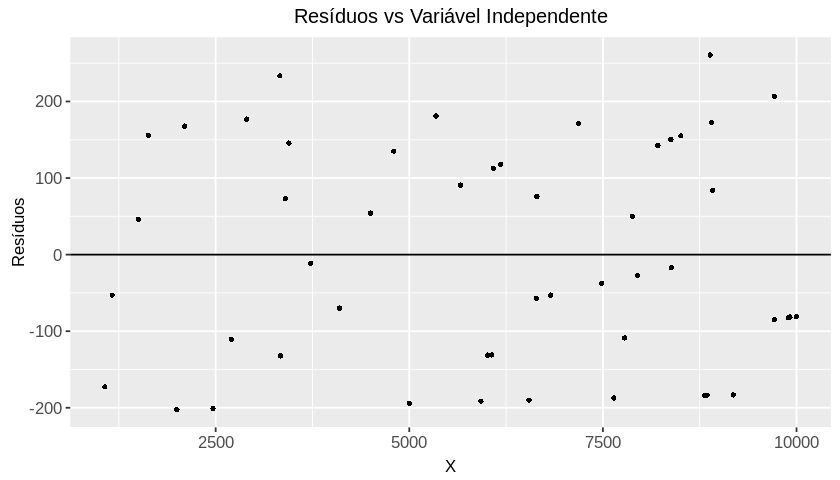

In [45]:
#APENAS 1 VARIÁVEL
ggplot(data = dataset, aes(x = X, y = Residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("X") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Variável Independente') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10)
    )

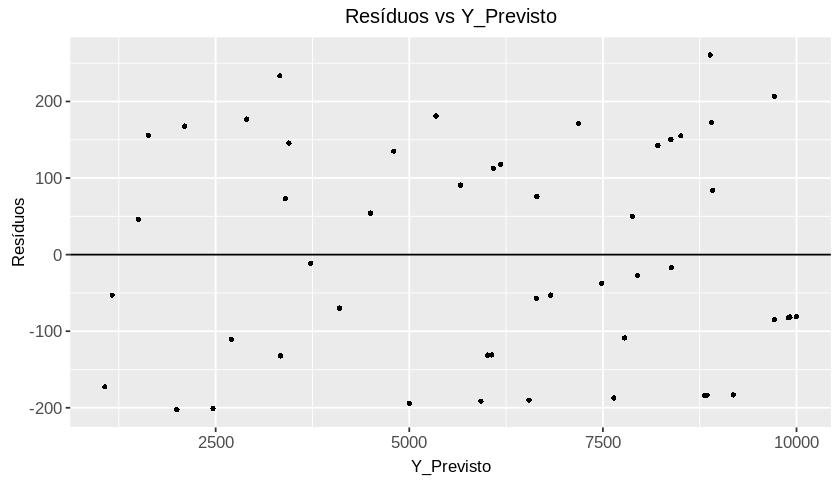

In [46]:
#VARIAVEIS MULTIPLAS
ggplot(data = dataset, aes(x = X, y = Residuos)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 0) + 
    xlab("Y_Previsto") + 
    ylab("Resíduos") + 
    ggtitle('Resíduos vs Y_Previsto') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

### Hipótese de variância constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Y_previsto' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

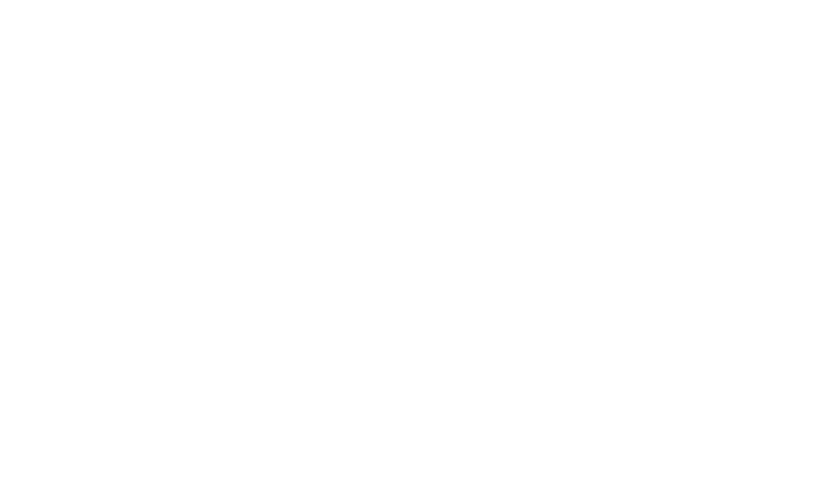

In [47]:
ggplot(data = dataset, aes(x = Y_previsto, y = Residuos^2)) + 
    geom_point(size = 1.5, stroke = 0) + 
    xlab("Y_Previsto") + 
    ylab("Resíduos²") + 
    ggtitle('Resíduos² vs Y_Previsto') +
    theme(
        plot.title=element_text(size = 12, hjust = 0.5),
        axis.title.y=element_text(size = 10, vjust = +0.2),
        axis.title.x=element_text(size = 10, vjust = -0.2),
        axis.text.y=element_text(size = 10),
        axis.text.x=element_text(size = 10),
    )

## <font color=green>4.7 O coeficiente de determinação $R^2$</font>
***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Soma do quadrados do erros (SQE)

In [48]:
head(dataset)

,Y,X,Y_estimado,Y_estimado_R,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3011,9714,3095.785,3095.785,-84.78509
2,1305,3728,1316.203,1316.203,-11.20301
3,1879,6062,2010.079,2010.079,-131.07948
4,2654,8845,2837.439,2837.439,-183.43948
5,2849,8378,2698.605,2698.605,150.39528
6,1068,3338,1200.260,1200.260,-132.25964


In [49]:
SQE <- sum(apply(dataset, 1, function(x) x['Residuos']**2))
SQE

[1] 984986

### Soma do quadrados total (SQT)

In [50]:
SQT <- sum(apply(dataset, 1, function(x) (x['Y'] - mean(dataset$Y))**2))
SQT

[1] 32724149

### Soma do quadrados da regressão (SQR)

In [51]:
SQR <- sum(apply(dataset, 1, function(x) (x['Y_previsto'] - mean(dataset$Y))**2))
SQR

[1] NA

### ANOVA

#### <font color=red>Documentações:

- [**anova**](https://www.rdocumentation.org/packages/stats/versions/3.6.1/topics/anova)

In [52]:
anova <- anova(resultado_regressao)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


In [53]:
anova[1,2] #SQR

[1] 31739163

In [54]:
anova[2,2] #SQE

[1] 984986

In [55]:
 anova[1,2] + anova[2,2] #SQT

[1] 32724149

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

Onde,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

### Coeficiente de determinação (R²)

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Observação</font>
> Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [56]:
R2 <- SQR / SQT
R2

[1] NA

In [58]:
resultado_regressao <- lm(formula = Y~X, data = dataset)
resumo <- summary(resultado_regressao)
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [59]:
resumo$r.squared

[1] 0.9699003

In [60]:
#EXERCICIO
dataset3 <- data.frame(
    Y = c(670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 
        2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 
        9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140),
    X = c(1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 
        5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 
        21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25)
)

resultado_regressao3 = lm(formula = Y~X, data = dataset)
resumo = summary(resultado_regressao3)
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [61]:
#EXERCICIO
SQT = 1325485/0.96
SQE = SQT - 1325485
SQE

[1] 55228.54

## <font color=green>4.8 Testes aplicados a modelos de regressão</font>
***

Como vimos, em uma regressão linear simples, a média da variável dependente ($Y$) é uma função linear da variável independente ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

Se o valor de $\beta_2$ for zero podemos verificar que o valor médio de $Y$ não depende do valor de $X$ e, portanto, concluímos que $X$ e $Y$ não estão linearmente relacionados. De forma alternativa, se o valor de $\beta_2$ não for igual a zero, concluímos que as duas variáveis estão relacionadas.

Para testar se a relação de regressão é significativa, é preciso realizar um **teste de hipóteses** para determinar se o valor de $\beta_2$ é zero. Antes de realizar este tipo de teste precisamos obter uma estimativa para $\sigma^2$ (variância do erro).

### Output do modelo de regressão estimado

In [ ]:
resumo


Call:
lm(formula = Y ~ X, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-202.49 -125.96  -22.28  140.53  260.67 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.079e+02  5.013e+01   4.148 0.000136 ***
X           2.973e-01  7.559e-03  39.328  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 143.2 on 48 degrees of freedom
Multiple R-squared:  0.9699,	Adjusted R-squared:  0.9693 
F-statistic:  1547 on 1 and 48 DF,  p-value: < 2.2e-16


In [ ]:
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


### Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

# $$EQM = \frac{SQE}{n-2}$$

In [ ]:
SQE

[1] 984986

In [ ]:
n

[1] 50

In [ ]:
EQM <- SQE/(n-2)
EQM

[1] 20520.54

In [ ]:
EQM <- anova$'Mean Sq'[2]
EQM

[1] 20520.54

In [ ]:
EQM <- anova['Residuals', 'Mean Sq']
EQM

[1] 20520.54

In [ ]:
#EXERCICIO
resultado_regressao3 = lm(formula = Y~X, data = dataset3)
resultado_regressao3
anova3 = anova(resultado_regressao3)
anova3


Call:
lm(formula = Y ~ X, data = dataset3)

Coefficients:
(Intercept)            X  
     -168.3        481.4  


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,858787220,858787220.5,7767.305,1.06586e-32
Residuals,25,2764109,110564.4,NA,NA


### Teste de hipótese para nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculando $s$

In [ ]:
s <- sqrt(EQM)
s

[1] 143.2499

### Calculando $\sum{(X_i - \bar{X})^2}$

In [ ]:
SOMA_DESVIO2 <- sum(apply(dataset,  1, function(x) (x['X'] - mean(dataset$X))**2))
SOMA_DESVIO2

[1] 359114426

### Calculando $s_{b_2}$

In [ ]:
s_beta_2 <- s / sqrt(SOMA_DESVIO2)
s_beta_2

[1] 0.007559238

### Determinando as áreas de aceitação e rejeição de $H_0$

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

### Níveis de confiança e significância

In [ ]:
confianca <- 0.95
significancia <- 0.5

In [ ]:
graus_de_liberdade <- n-2
graus_de_liberdade

[1] 48

### Obtendo $t_{\alpha/2}$

In [ ]:
probabilidade <- 0.975
probabilidade


[1] 0.975

[1] 1.959964

In [ ]:
t_alpha_2 <- qt(probabilidade, graus_de_liberdade)
t_alpha_2

[1] 2.010635

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img032.png)

### Obtendo $t = \frac{b_2 - \beta_2}{s_{b_2}}$

In [ ]:
beta_2
t <- ( beta_2 - 0 ) / s_beta_2
t

[1] 0.2972907

[1] 39.32813

In [ ]:
coeficientes = resumo$coefficients
coeficientes

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),207.9033138,50.126682183,4.147558,1.362270e-04
X,0.2972907,0.007559238,39.328132,3.555543e-38


In [ ]:
coeficientes <- 
coeficientes

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img033.png)

### Etapas e regras de decisão do teste t de significância dos parâmetros

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

In [ ]:
t <= -t_alpha_2

[1] FALSE

In [ ]:
t >= t_alpha_2

[1] TRUE

In [ ]:
if ((t <= -t_alpha_2) || (t >= t_alpha_2)) {
  'Rejeitar Ho'
}else{
  'Aceitar Ho'
}
#REJEITAR Ho


[1] "Rejeitar Ho"

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor <- 2 * pt(t, graus_de_liberdade, lower.tail = FALSE) 
p_valor

[1] 3.555543e-38

In [ ]:
p_valor <- 
p_valor

In [ ]:
p_valor <= significancia

[1] TRUE

### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

---

### Teste F

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

### Calculando a estatística de teste ($F$)

In [69]:
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,31739163,31739163.24,1546.702,3.555543e-38
Residuals,48,984986,20520.54,NA,NA


In [71]:
SQR <- anova['X', 'Mean Sq']
SQR

[1] 31739163

In [72]:
EQM <- anova['Residuals', 'Mean Sq']
EQM

[1] 20520.54

In [73]:
F = SQR/SQE
F

[1] 1546.702

### Obtendo o p-valor

In [74]:
p_valor <- anova['X', 'Pr(>F)']
p_valor

[1] 3.555543e-38

In [ ]:
p_valor <= significancia